In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [2]:
param = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
print(param.keys())
Lin = LinData.LinData_Class(param)
f = pd.read_table(param['HorSpath']+param['simname']+'/h5_data.csv', delimiter=',')
print(f.keys())

dict_keys(['simname', 'HorSpath', 'datapath', 'h5datapath', 'cctk_initial_time', 'cctk_final_time', 'terminate', 'dtfac', 'adaptive_stepsize', 'domainsize', 'xmin', 'ymin', 'zmin', 'xmax', 'ymax', 'zmax', 'dx', 'dy', 'dz', 'boundary_size_x_lower', 'boundary_size_y_lower', 'boundary_size_z_lower', 'boundary_size_x_upper', 'boundary_size_y_upper', 'boundary_size_z_upper', 'boundary_shiftout_x_lower', 'boundary_shiftout_y_lower', 'boundary_shiftout_z_lower', 'boundary_shiftout_x_upper', 'boundary_shiftout_y_upper', 'boundary_shiftout_z_upper', 'type', 'periodic', 'use_mask', 'init_fill_timelevels', 'prolongation_order_time', 'poison_new_timelevels', 'domain_from_coordbase', 'max_refinement_levels', 'ghost_size', 'use_buffer_zones', 'prolongation_order_space', 'poison_new_memory', 'max_allowed_memory_MB', 'grid_structure_filename', 'grid_coordinates_filename', 'initial_data_setup_method', 'initial_data', 'my_initial_data', 'coupling', 'ICPertFLRW_expansion', 'ICPertFLRW_Amp_pert1', 'ICPert

In [3]:
param64 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')
Lin64 = LinData.LinData_Class(param64)
f64 = pd.read_table(param64['HorSpath']+param64['simname']+'/h5_data.csv', delimiter=',')
param32 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')
Lin32 = LinData.LinData_Class(param32)
f32 = pd.read_table(param32['HorSpath']+param32['simname']+'/h5_data.csv', delimiter=',')

 read time file
 read time file


In [4]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    f32 = interpolate(interpolate(f32))
    f64 = interpolate(f64)
    while len(f32)<len(f128):
        f32 = extrapolate(f32)
    while len(f64)<len(f128):
        f64 = extrapolate(f64)
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

Text(0.5, 1.0, '$\\gamma^{\\frac{1}{3}} \\; {}^{(3)}R \\;\\; [\\lambda_{pert}^{-2}]$')

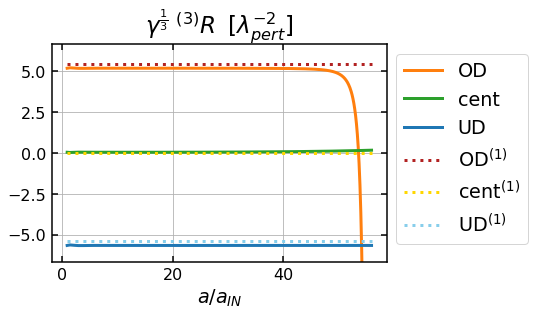

In [17]:
L = param['ICPertFLRW_lambda_pert1']
an = Lin.an_initial(f['t'])
plt.plot(an, (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2), color='C1', label='OD')
plt.plot(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2), color='C0', label='UD')

plt.plot(an, Lin.dRicciSconf(f['t'], loc='OD')*(L**2), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='UD')*(L**2), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
plt.grid()
plt.ylim(-2e-6*(L**2), 2e-6*(L**2))
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\gamma^{\frac{1}{3}} \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')

Text(0.5, 1.0, '$\\gamma^{\\frac{1}{3}} \\; {}^{(3)}R \\;\\; [\\lambda_{pert}^{-2}]$')

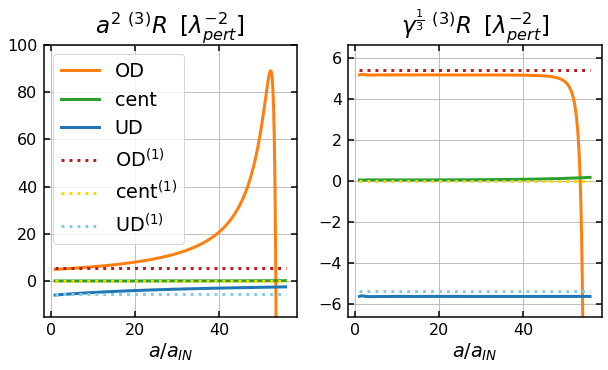

In [11]:
L = param['ICPertFLRW_lambda_pert1']
an = Lin.an_initial(f['t'])
plt.figure(figsize=(10, 5))
plt.subplot(121)
a2 = Lin.evo.a(f['t'])**2
plt.plot(an, a2*f['RicciS_OD']*(L**2), color='C1', label='OD')
plt.plot(an, a2*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, a2*f['RicciS_UD']*(L**2), color='C0', label='UD')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='OD')*(L**2), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='UD')*(L**2), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
plt.grid()
plt.ylim(-15, 100)
plt.legend()
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$a^2 \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')

plt.subplot(122)
plt.plot(an, (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2), color='C1', label='OD')
plt.plot(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2), color='C0', label='UD')

plt.plot(an, Lin.dRicciSconf(f['t'], loc='OD')*(L**2), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='UD')*(L**2), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
plt.grid()
plt.ylim(-2e-6*(L**2), 2e-6*(L**2))
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\gamma^{\frac{1}{3}} \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')

Text(0.5, 1.0, '$\\gamma^{\\frac{1}{3}} \\; {}^{(3)}R \\;\\; [\\lambda_{pert}^{-2}]$')

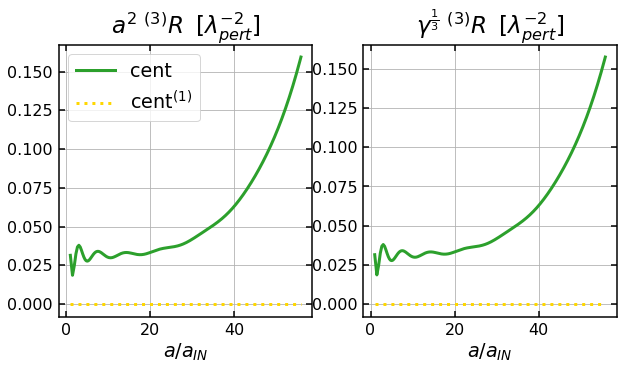

In [72]:
L = param['ICPertFLRW_lambda_pert1']
an = Lin.an_initial(f['t'])
plt.figure(figsize=(10, 5))
plt.subplot(121)
a2 = Lin.evo.a(f['t'])**2
plt.plot(an, a2*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.grid()
#plt.ylim(-15, 100)
plt.legend()
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$a^2 \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')

plt.subplot(122)
plt.plot(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.grid()
#plt.ylim(-2e-6*(L**2), 2e-6*(L**2))
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\gamma^{\frac{1}{3}} \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')

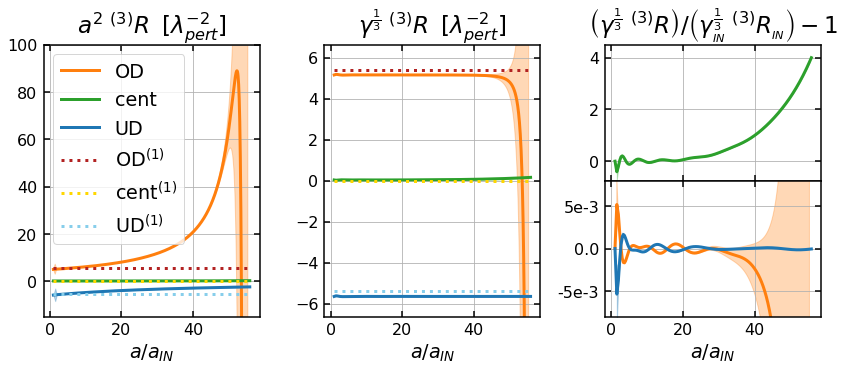

In [69]:
L = param['ICPertFLRW_lambda_pert1']
an = Lin.an_initial(f['t'])
plt.figure(figsize=(12, 5))
plt.subplot(131)
a2 = Lin.evo.a(f['t'])**2
plt.plot(an, a2*f['RicciS_OD']*(L**2), color='C1', label='OD')
plt.plot(an, a2*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, a2*f['RicciS_UD']*(L**2), color='C0', label='UD')

err = get_error(f32['RicciS_OD']*(L**2),
                f64['RicciS_OD']*(L**2),
                f['RicciS_OD']*(L**2))
plt.fill_between(an, a2*(f['RicciS_OD']*(L**2)+err), 
                 a2*(f['RicciS_OD']*(L**2)-err), facecolor='C1', edgecolor='C1', alpha=0.3)

err = get_error(f32['RicciS_cent']*(L**2),
                f64['RicciS_cent']*(L**2),
                f['RicciS_cent']*(L**2))
plt.fill_between(an, a2*(f['RicciS_cent']*(L**2)+err), 
                 a2*(f['RicciS_cent']*(L**2)-err), facecolor='C2', edgecolor='C2', alpha=0.3)

err = get_error(f32['RicciS_UD']*(L**2),
                f64['RicciS_UD']*(L**2),
                f['RicciS_UD']*(L**2))
plt.fill_between(an, a2*(f['RicciS_UD']*(L**2)+err), 
                 a2*(f['RicciS_UD']*(L**2)-err), facecolor='C0', edgecolor='C0', alpha=0.3)


plt.plot(an, Lin.dRicciSconf(f['t'], loc='OD')*(L**2), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='UD')*(L**2), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
plt.grid()
plt.ylim(-15, 100)
plt.legend()
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$a^2 \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')

plt.subplot(132)
plt.plot(an, (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2), color='C1', label='OD')
plt.plot(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2), color='C0', label='UD')

err = get_error((f32['gdet_OD']**(1/3))*f32['RicciS_OD']*(L**2),
                (f64['gdet_OD']**(1/3))*f64['RicciS_OD']*(L**2),
                (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2))
plt.fill_between(an, (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2)+err, 
                 (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2)-err, facecolor='C1', edgecolor='C1', alpha=0.3)

err = get_error((f32['gdet_cent']**(1/3))*f32['RicciS_cent']*(L**2),
                (f64['gdet_cent']**(1/3))*f64['RicciS_cent']*(L**2),
                (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2))
plt.fill_between(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2)+err, 
                 (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2)-err, facecolor='C2', edgecolor='C2', alpha=0.3)

err = get_error((f32['gdet_UD']**(1/3))*f32['RicciS_UD']*(L**2),
                (f64['gdet_UD']**(1/3))*f64['RicciS_UD']*(L**2),
                (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2))
plt.fill_between(an, (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2)+err, 
                 (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2)-err, facecolor='C0', edgecolor='C0', alpha=0.3)

plt.plot(an, Lin.dRicciSconf(f['t'], loc='OD')*(L**2), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='UD')*(L**2), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
plt.grid()
plt.ylim(-2e-6*(L**2), 2e-6*(L**2))
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\gamma^{\frac{1}{3}} \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')



plt.subplot(233)
plt.plot(an, (((f['gdet_cent']**(1/3))*f['RicciS_cent'])
              / ((f['gdet_cent'][0]**(1/3))*f['RicciS_cent'][0])-1), color='C2', label='cent')

d128 = (( (f['gdet_cent']**(1/3))*f['RicciS_cent']) 
        / ((f['gdet_cent'][0]**(1/3))*f['RicciS_cent'][0]) - 1)
err = get_error((( (f32['gdet_cent']**(1/3))*f32['RicciS_cent'] ) 
                 / ( (f32['gdet_cent'][0]**(1/3))*f32['RicciS_cent'][0] ) - 1),
                (( (f64['gdet_cent']**(1/3))*f64['RicciS_cent'] ) 
                 / ( (f64['gdet_cent'][0]**(1/3))*f64['RicciS_cent'][0] ) - 1),
                d128)
plt.fill_between(an, d128+err, d128-err, facecolor='C2', edgecolor='C2', alpha=0.3)
plt.grid()
plt.xticks([0, 20, 40], ['']*3)
plt.ylim(-0.75, 4.5)
plt.title(r'$\left(\gamma^{\frac{1}{3}} \; {}^{(3)}R \right) / \left(\gamma^{\frac{1}{3}}_{{}_{IN}} \; {}^{(3)}R_{{}_{IN}} \right) - 1$')

plt.subplot(236)
plt.plot(an, (((f['gdet_OD']**(1/3))*f['RicciS_OD'])
              / ((f['gdet_OD'][0]**(1/3))*f['RicciS_OD'][0])-1), color='C1', label='OD')
plt.plot(an, (((f['gdet_UD']**(1/3))*f['RicciS_UD'])
              / ((f['gdet_UD'][0]**(1/3))*f['RicciS_UD'][0])-1), color='C0', label='UD')

d128 = (( (f['gdet_OD']**(1/3))*f['RicciS_OD']) 
        / ((f['gdet_OD'][0]**(1/3))*f['RicciS_OD'][0]) - 1)
err = get_error((( (f32['gdet_OD']**(1/3))*f32['RicciS_OD'] ) 
                 / ( (f32['gdet_OD'][0]**(1/3))*f32['RicciS_OD'][0] ) - 1),
                (( (f64['gdet_OD']**(1/3))*f64['RicciS_OD'] ) 
                 / ( (f64['gdet_OD'][0]**(1/3))*f64['RicciS_OD'][0] ) - 1),
                d128)
plt.fill_between(an, d128+err, d128-err, facecolor='C1', edgecolor='C1', alpha=0.3)

d128 = (( (f['gdet_UD']**(1/3))*f['RicciS_UD']) 
        / ((f['gdet_UD'][0]**(1/3))*f['RicciS_UD'][0]) - 1)
err = get_error((( (f32['gdet_UD']**(1/3))*f32['RicciS_UD'] ) 
                 / ( (f32['gdet_UD'][0]**(1/3))*f32['RicciS_UD'][0] ) - 1),
                (( (f64['gdet_UD']**(1/3))*f64['RicciS_UD'] ) 
                 / ( (f64['gdet_UD'][0]**(1/3))*f64['RicciS_UD'][0] ) - 1),
                d128)
plt.fill_between(an, d128+err, d128-err, facecolor='C0', edgecolor='C0', alpha=0.3)
plt.grid()
plt.yticks([-5e-3, 0, 5e-3], ['-5e-3', '0.0', '5e-3'])
plt.ylim(-0.008, 0.008)
plt.xlabel(r'$a/a_{IN}$')

plt.subplots_adjust(hspace=0, left=0.05, wspace=0.3, right=0.95)
plt.savefig(param['HorSpath']+param['simname']+'/plots/Collapse_evo2', dpi=300)#, bbox_inches ='tight', pad_inches=0.2)

Text(0.5, 1.0, '$\\gamma^{\\frac{1}{3}} \\; {}^{(3)}R \\;\\; [\\lambda_{pert}^{-2}]$')

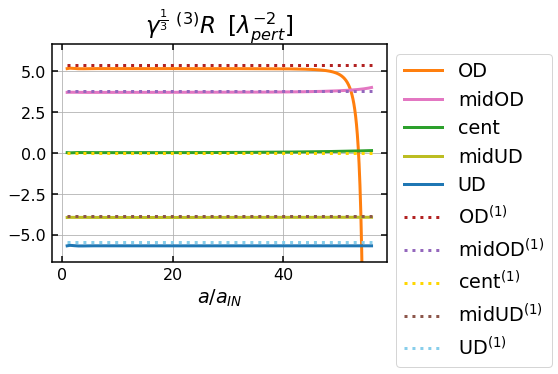

In [13]:
L = param['ICPertFLRW_lambda_pert1']
an = Lin.an_initial(f['t'])
plt.plot(an, (f['gdet_OD']**(1/3))*f['RicciS_OD']*(L**2), color='C1', label='OD')
plt.plot(an, (f['gdet_midOD']**(1/3))*f['RicciS_midOD']*(L**2), color='C6', label='midOD')
plt.plot(an, (f['gdet_cent']**(1/3))*f['RicciS_cent']*(L**2), color='C2', label='cent')
plt.plot(an, (f['gdet_midUD']**(1/3))*f['RicciS_midUD']*(L**2), color='C8', label='midUD')
plt.plot(an, (f['gdet_UD']**(1/3))*f['RicciS_UD']*(L**2), color='C0', label='UD')

plt.plot(an, Lin.dRicciSconf(f['t'], loc='OD')*(L**2), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='midOD')*(L**2), linestyle=':', color='C4', label='midOD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='cent')*(L**2), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='midUD')*(L**2), linestyle=':', color='C5', label='midUD'+r'${}^{(1)}$')
plt.plot(an, Lin.dRicciSconf(f['t'], loc='UD')*(L**2), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
plt.grid()
plt.ylim(-2e-6*(L**2), 2e-6*(L**2))
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\gamma^{\frac{1}{3}} \; {}^{(3)}R \;\; [\lambda_{pert}^{-2}]$')

Text(0.5, 0, '$a/a_{IN}$')

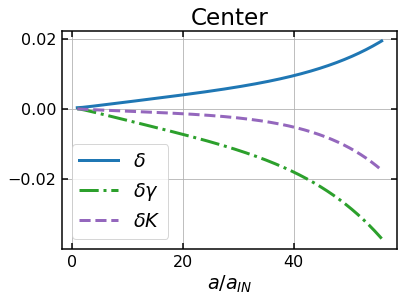

In [30]:
plt.plot(an, f['drho_cent'], 'C0-', label=r'$\delta$')
plt.plot(an, f['dgdet_cent'], 'C2-.', label=r'$\delta \gamma$')
plt.plot(an, f['dK_cent'], 'C4--', label=r'$\delta K$')
plt.grid()
plt.legend()
plt.title('Center')
plt.xlabel(r'$a/a_{IN}$')

<ipython-input-62-3ea767d16524>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ins = plt.subplot(132).inset_axes([0.05,0.59,0.55,0.39])


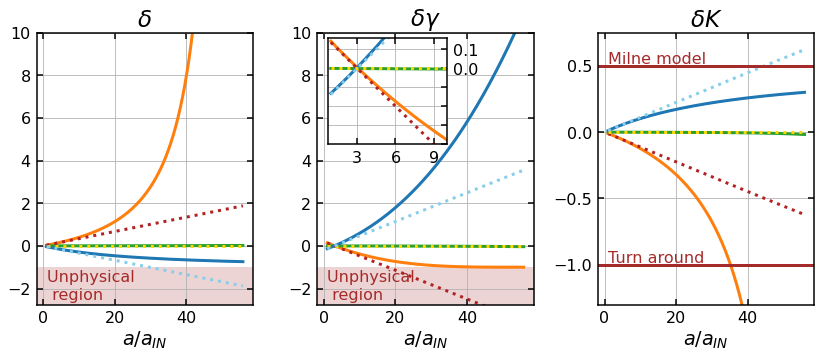

In [62]:
L = param['ICPertFLRW_lambda_pert1']
an = Lin.an_initial(f['t'])

plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.plot(an, f['drho_OD'], color='C1', label='OD')
plt.plot(an, f['drho_cent'], color='C2', label='cent')
plt.plot(an, f['drho_UD'], color='C0', label='UD')
err = get_error(f32['drho_OD'],f64['drho_OD'],f['drho_OD'])
plt.fill_between(an, f['drho_OD']+err, 
                 f['drho_OD']-err, facecolor='C1', edgecolor='C1', alpha=0.3)
err = get_error(f32['drho_cent'],f64['drho_cent'],f['drho_cent'])
plt.fill_between(an, f['drho_cent']+err, 
                 f['drho_cent']-err, facecolor='C2', edgecolor='C2', alpha=0.3)
err = get_error(f32['drho_UD'],f64['drho_UD'],f['drho_UD'])
plt.fill_between(an, f['drho_UD']+err, 
                 f['drho_UD']-err, facecolor='C0', edgecolor='C0', alpha=0.3)
plt.plot(an, Lin.drho(f['t'], loc='OD'), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.drho(f['t'], loc='cent'), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.drho(f['t'], loc='UD'), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
xmin, xmax = plt.gca().axes.get_xlim()
x = np.arange(xmin-10, xmax+10, 10)
plt.fill_between(x, [-10]*len(x), [-1]*len(x), facecolor='brown', edgecolor=None, alpha=0.2, label='Unphysical')
plt.xlim(xmin, xmax)
plt.text(1, -2.5, 'Unphysical \n region', c='brown')
plt.grid()
plt.ylim(-2.75, 10)
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\delta$')

plt.subplot(132)
plt.plot(an, f['dgdet_OD'], color='C1', label='OD')
plt.plot(an, f['dgdet_cent'], color='C2', label='cent')
plt.plot(an, f['dgdet_UD'], color='C0', label='UD')
err = get_error(f32['dgdet_OD'],f64['dgdet_OD'],f['dgdet_OD'])
plt.fill_between(an, f['dgdet_OD']+err, 
                 f['dgdet_OD']-err, facecolor='C1', edgecolor='C1', alpha=0.3)
err = get_error(f32['dgdet_cent'],f64['dgdet_cent'],f['dgdet_cent'])
plt.fill_between(an, f['dgdet_cent']+err, 
                 f['dgdet_cent']-err, facecolor='C2', edgecolor='C2', alpha=0.3)
err = get_error(f32['dgdet_UD'],f64['dgdet_UD'],f['dgdet_UD'])
plt.fill_between(an, f['dgdet_UD']+err, 
                 f['dgdet_UD']-err, facecolor='C0', edgecolor='C0', alpha=0.3)
plt.plot(an, Lin.dgdet(f['t'], loc='OD'), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dgdet(f['t'], loc='cent'), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dgdet(f['t'], loc='UD'), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
xmin, xmax = plt.gca().axes.get_xlim()
x = np.arange(xmin-10, xmax+10, 10)
plt.fill_between(x, [-10]*len(x), [-1]*len(x), facecolor='brown', edgecolor=None, alpha=0.2, label='Unphysical')
plt.xlim(xmin, xmax)
plt.text(1, -2.5, 'Unphysical \n region', c='brown')
plt.grid()
plt.ylim(-2.75, 10)
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\delta\gamma$')

ins = plt.subplot(132).inset_axes([0.05,0.59,0.55,0.39])
ins.plot(an, f['dgdet_OD'], color='C1', label='OD')
ins.plot(an, f['dgdet_cent'], color='C2', label='cent')
ins.plot(an, f['dgdet_UD'], color='C0', label='UD')
err = get_error(f32['dgdet_OD'],f64['dgdet_OD'],f['dgdet_OD'])
ins.fill_between(an, f['dgdet_OD']+err, 
                 f['dgdet_OD']-err, facecolor='C1', edgecolor='C1', alpha=0.3)
err = get_error(f32['dgdet_cent'],f64['dgdet_cent'],f['dgdet_cent'])
ins.fill_between(an, f['dgdet_cent']+err, 
                 f['dgdet_cent']-err, facecolor='C2', edgecolor='C2', alpha=0.3)
err = get_error(f32['dgdet_UD'],f64['dgdet_UD'],f['dgdet_UD'])
ins.fill_between(an, f['dgdet_UD']+err, 
                 f['dgdet_UD']-err, facecolor='C0', edgecolor='C0', alpha=0.3)
ins.plot(an, Lin.dgdet(f['t'], loc='OD'), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
ins.plot(an, Lin.dgdet(f['t'], loc='cent'), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
ins.plot(an, Lin.dgdet(f['t'], loc='UD'), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
ins.set_ylim(-0.4, 0.16)
ins.set_xlim(0.8, 10)
ins.set_yticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1])#, .2, .4])
ins.set_yticklabels(['', '', '', '', '0.0', '0.1'])
ins.set_xticks([3, 6, 9])
ins.grid()
ins.yaxis.tick_right()

plt.subplot(133)
plt.plot(an, f['dK_OD'], color='C1', label='OD')
plt.plot(an, f['dK_cent'], color='C2', label='cent')
plt.plot(an, f['dK_UD'], color='C0', label='UD')
err = get_error(f32['dK_OD'],f64['dK_OD'],f['dK_OD'])
plt.fill_between(an, f['dK_OD']+err, 
                 f['dK_OD']-err, facecolor='C1', edgecolor='C1', alpha=0.3)
err = get_error(f32['dK_cent'],f64['dK_cent'],f['dK_cent'])
plt.fill_between(an, f['dK_cent']+err, 
                 f['dK_cent']-err, facecolor='C2', edgecolor='C2', alpha=0.3)
err = get_error(f32['dK_UD'],f64['dK_UD'],f['dK_UD'])
plt.fill_between(an, f['dK_UD']+err, 
                 f['dK_UD']-err, facecolor='C0', edgecolor='C0', alpha=0.3)
plt.plot(an, Lin.dK(f['t'], loc='OD'), linestyle=':', color='firebrick', label='OD'+r'${}^{(1)}$')
plt.plot(an, Lin.dK(f['t'], loc='cent'), linestyle=':', color='gold', label='cent'+r'${}^{(1)}$')
plt.plot(an, Lin.dK(f['t'], loc='UD'), linestyle=':', color='skyblue', label='UD'+r'${}^{(1)}$')
plt.axhline(y=-1, c='brown')
plt.text(1, -0.98, 'Turn around', c='brown')
plt.axhline(y=0.5, c='brown')
plt.text(1, 0.52, 'Milne model', c='brown')
plt.grid()
plt.ylim(-1.3, 0.75)
#plt.legend(bbox_to_anchor=(1,1))
plt.xlabel(r'$a/a_{IN}$')
plt.title(r'$\delta K$')
plt.subplots_adjust(left=0.05, wspace=0.3, right=0.95)
plt.savefig(param['HorSpath']+param['simname']+'/plots/Collapse_evo1', dpi=300)#, bbox_inches ='tight', pad_inches=0.2)

'/home/robynm/simulations/pflrw_d3e2_L1821_t1_N128_LCDM/plots/'